# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Lawrence Huang

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
[Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

[Preprocessing](#Preprocessing)<p>
[Section 1. Compare and test the normality of the distributions of price and log price.](#Section-1)<p>
[Section 2. Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive.](#Section-2)<p>
[Section 3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the price (or log price if closer to a normal distribution) of autos stratified by body style](#Section-3)<p>
[Section 4&5. Graphically explore the differences between the price conditioned by the categories of each variable; Use standard ANOVA and Tukey HSD to test the differences of these groups](#Section-4&5)

#### Preprocessing

In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import numpy.random as nr
import matplotlib.pyplot as plt
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
auto = pd.read_csv(fileName)
print('dataframe shape:')
print(auto.shape)
auto.head()

dataframe shape:
(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# making a list of missing value types
missing_values = ['?']
auto = pd.read_csv(fileName, na_values=missing_values)

# total missing values for each feature
print('# of missing values:')
print(auto.isnull().sum())

# most missing values are in normalized-losses. Drop normalized-losses column
auto.drop('normalized-losses', axis=1, inplace=True)

# Drop rows with missing data
# In particular, cannot compute log_price for the missing data in price 
auto.dropna(axis=0, inplace=True)

print('\n')
print('dataframe shape:')
print(auto.shape)
auto.head()

# of missing values:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


dataframe shape:
(193, 25)


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Section 1
<b>Compare and test the normality of the distributions of price and log price. 
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.</b>

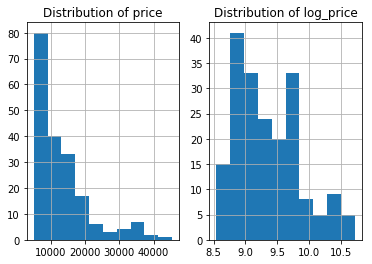

In [3]:
# create log price
auto['log_price'] = np.log(auto['price'])

# examine distributions of price and log_price
fig, axs = plt.subplots(1,2)
auto['price'].hist(ax=axs[0])
auto['log_price'].hist(ax=axs[1])
axs[0].set_title('Distribution of price')
axs[1].set_title('Distribution of log_price')
plt.show()

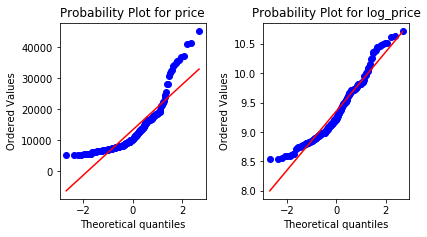

In [4]:
# Graphical method: Q-Q plot
def qq_plot(vec1, vec2):
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1.set_title('Probability Plot for '+vec1.name)
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    ax1.set_title('Probability Plot for '+vec2.name)
    plt.tight_layout()

# plot Q-Q plots
qq_plot(auto['price'], auto['log_price'])

<b>Results from graphical method (Q-Q plot):</b>

Using probplot from scipy.stats, the above function generated a probability plot of the sample data against the quantiles of the normal distribution. If the points of the plot fall on an approximately straight line, one can conclude that the sample distribution is close to the normal distribution. 

Here, by visual inspection, log_price appears closer to a normal distribution compared to price, while both exhibit some deviation from the straight line. A formal test follows below.

In [5]:
# standardize samples before applying the K-S test  
auto_price_s = scale(auto['price'])
auto_log_price_s = scale(auto['log_price'])

# plot CDF of the sample and the CDF of the theoretical distribution
def plot_cums(dist1, dist2, label1, label2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label=label1)
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label=label2)
    
    plt.legend()

# compute K-S statistic
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))


price:
KS-statistic = 0.15570653643875398
P-value = 0.00014924310941231902


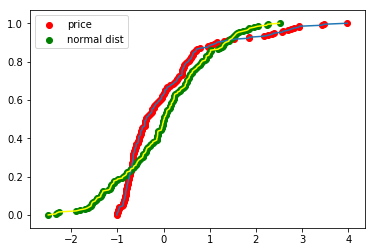

In [6]:
# price
print('\nprice:')
plot_cums(auto_price_s, scale(nr.normal(size = len(auto_price_s))).tolist(), 'price', 'normal dist')
ks_test(auto_price_s)


log_price:
KS-statistic = 0.10302687448682402
P-value = 0.030871835339169262


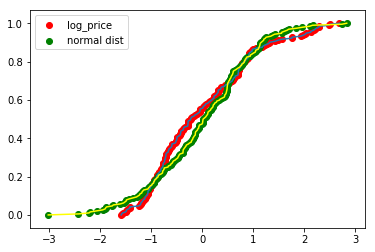

In [7]:
# log_price
print('\nlog_price:')
plot_cums(auto_log_price_s, scale(nr.normal(size = len(auto_log_price_s))).tolist(), 'log_price', 'normal dist') 
ks_test(auto_log_price_s)

<b>Results from a formal test (Kolmogorov-Smirnov Test):</b>


1. As a first step, the CDFs of the sample (price or log_price) and the normal distribution were plotted.
<ul><li>There are significant deviations between the CDFs of price and normal distribution. This result indicates that the two samples are drawn from different distributions.</li>
    <li>There are also deviations between the CDFs of log_price and normal distribution, but the deviations are smaller than that for price.</li></ul>


2. In the next step the K-S statistic is computed: the maximum vertical distance between the 2 CDFs, and the p-value or probability that this difference arises from chance alone.
<ul><li>
For both price and log_price, the K-S statistic is large and the p-value is small. We can reject the null hypothesis that these samples have the same distribution as the normal distribution; the chance of this difference of arising from random variation alone is small.</li></ul>

<b>Summary from graphical method and format test: price and log_price are not normally distributed, but log_price is closer to a normal distribution.</b>

#### Section 2
<b>Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive. Use both graphical methods and the formal test.</b>

Here, will test log_price.
There are 2 groups for each comparison; will use 2-sided t-test (not assuming that the populations have equal variance).

In [8]:
# perform 2-sided t-test, does not assume that the populations have equal variance
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   

# plot histogram with solid red line for the mean, and dashed red lines for the the upper and lower confidence interval of the difference of means of the populations.
# (the confidence interval is taken from the t_test function above)
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

# plot histogram with red line for the mean    
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

# wrapper to plot histograms of the two populations along with a line for the mean of each population
# and the upper and lower confidence bounds shown as dashed lines (by calling hist_mean_ci and hist_plot above)
def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histogram of log_price by ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

breakdown:
gas       174
diesel     19
Name: fuel-type, dtype: int64


DegFreedom    22.314284
Difference    -0.244227
Statistic     -2.028868
PValue         0.054569
Low95CI       -0.493667
High95CI       0.005214
dtype: float64


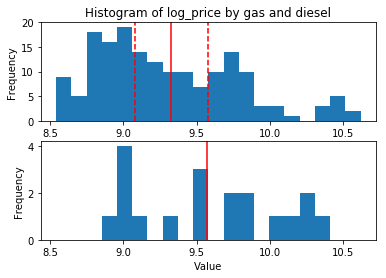

In [9]:
# Examining log_price by fuel-type
print('breakdown:')
print(auto['fuel-type'].value_counts())
auto_gas = auto.groupby('fuel-type').get_group('gas')['log_price']
auto_diesel = auto.groupby('fuel-type').get_group('diesel')['log_price']

test = t_test(auto_gas, auto_diesel, 0.05)
print('\n')
print(test)
plot_t(auto_gas, auto_diesel, test, cols=['gas', 'diesel'])

<b>Test significance of price stratified by fuel type:</b>

Formal test (2-sided t-test):
    <li>Difference in means is small.</li><li>The t-statistic is small and the p-value is large. Therefore, there is a high chance that the difference in means is from random variation alone.</li>
    <li>The 95% confidence interval straddles 0.</li>
    <li>Based on these statistics we cannot reject the null hypothesis.</li>
    
Graphical:
<li>The mean of the population in the lower plot is within the confidence interval of the difference of means of the populations. This confirms that we cannot reject the null hypothesis that there is no significant difference in these means.</li>

breakdown:
std      158
turbo     35
Name: aspiration, dtype: int64


DegFreedom    65.776506
Difference    -0.355190
Statistic     -4.696291
PValue         0.000014
Low95CI       -0.506204
High95CI      -0.204176
dtype: float64


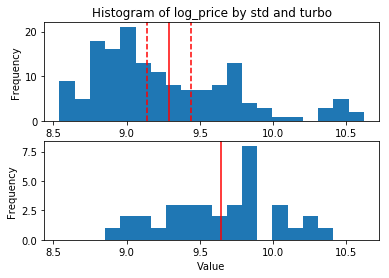

In [10]:
# Examining log_price by aspiration
print('breakdown:')
print(auto['aspiration'].value_counts())
auto_std = auto.groupby('aspiration').get_group('std')['log_price']
auto_turbo = auto.groupby('aspiration').get_group('turbo')['log_price']

test = t_test(auto_std, auto_turbo, 0.05)
print('\n')
print(test)
plot_t(auto_std, auto_turbo, test, cols=['std', 'turbo'])

<b>Test significance of log_price stratified by aspiration type:</b><br>
Formal test (2-sided t-test):
    <li>Difference in means is large.</li><li>The t-statistic is large and the p-value is small. Therefore, there is a low chance that the difference in means is from random variation alone.</li>
    <li>The 95% confidence interval does not straddle 0.</li>
    <li>Based on these statistics we reject the null hypothesis.</li>
    
Graphical:
<li>The mean of the population in the lower plot is outside the confidence interval of the difference of means of the populations. This confirms that we reject the null hypothesis that there is no significant difference in these means.</li>

breakdown:
fwd    114
rwd     71
4wd      8
Name: drive-wheels, dtype: int64


DegFreedom    1.166429e+02
Difference   -7.394032e-01
Statistic    -1.221283e+01
PValue        1.346458e-22
Low95CI      -8.593095e-01
High95CI     -6.194968e-01
dtype: float64


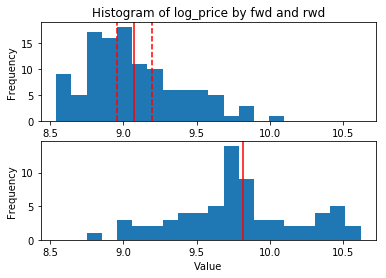

In [11]:
# Examining log_price by rear vs. front wheel drive
print('breakdown:')
print(auto['drive-wheels'].value_counts())
auto_fwd = auto.groupby('drive-wheels').get_group('fwd')['log_price']
auto_rwd = auto.groupby('drive-wheels').get_group('rwd')['log_price']

test = t_test(auto_fwd, auto_rwd, 0.05)
print('\n')
print(test)
plot_t(auto_fwd, auto_rwd, test, cols=['fwd', 'rwd'])

<b>Test significance of price stratified by drive-wheels (foward vs rear):</b><br>
Formal test (2-sided t-test):
    <li>Difference in means is large.</li><li>The t-statistic is large and the p-value is small. Therefore, there is a low chance that the difference in means is from random variation alone.</li>
    <li>The 95% confidence interval does not straddle 0.</li>
    <li>Based on these statistics we reject the null hypothesis.</li>
    
Graphical:
<li>The mean of the population in the lower plot is outside the confidence interval of the difference of means of the populations. This confirms that we reject the null hypothesis that there is no significant difference in these means.</li>

#### Section 3
<b>Apply ANOVA and Tukey's HSD test to the auto price data to compare the price (or log price if closer to a normal distribution) of autos stratified by body style.</b>

From Section 1, log_price is closer to a normal distribution compared to price. Will test log_price.

In [12]:
# use log_price
# stratify by body style
print('breakdown:')
print(auto['body-style'].value_counts())
auto_sedan = auto.groupby('body-style').get_group('sedan')['log_price']
auto_hatchback = auto.groupby('body-style').get_group('hatchback')['log_price']
auto_wagon = auto.groupby('body-style').get_group('wagon')['log_price']
auto_hardtop = auto.groupby('body-style').get_group('hardtop')['log_price']
auto_convertible = auto.groupby('body-style').get_group('convertible')['log_price']

breakdown:
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64


In [13]:
# ANOVA
f_statistic, p_value = ss.f_oneway(auto_sedan, auto_hatchback, auto_wagon, auto_hardtop, auto_convertible)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 8.821980795225976
P-value = 1.5055219795547482e-06


  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1     group2  meandiff  lower   upper  reject
-----------------------------------------------------
convertible  hardtop  -0.0966  -0.8018  0.6085 False 
convertible hatchback -0.7854  -1.3432 -0.2276  True 
convertible   sedan   -0.4461  -0.9962  0.104  False 
convertible   wagon    -0.531  -1.1269  0.0649 False 
  hardtop   hatchback -0.6887  -1.1788 -0.1987  True 
  hardtop     sedan   -0.3495  -0.8307  0.1318 False 
  hardtop     wagon   -0.4344  -0.9674  0.0986 False 
 hatchback    sedan    0.3393   0.1258  0.5528  True 
 hatchback    wagon    0.2544  -0.0588  0.5675 False 
   sedan      wagon   -0.0849  -0.3842  0.2143 False 
-----------------------------------------------------


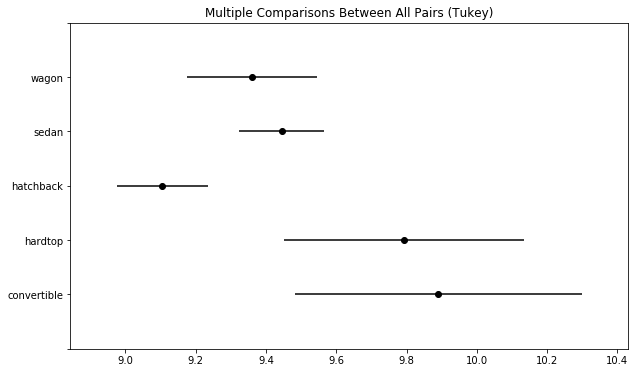

In [14]:
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((auto_sedan, auto_hatchback, auto_wagon, auto_hardtop, auto_convertible)).flatten(),
                   'group_num': ['sedan']*len(auto_sedan)+['hatchback']*len(auto_hatchback)+['wagon']*len(auto_wagon)+
                   ['hardtop']*len(auto_hardtop)+['convertible']*len(auto_convertible)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)
Tukey_HSD.plot_simultaneous();

<b>log_price by body-type summary:</b>
1. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


2. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>hatchback and sedan</li>
        <li>hardtop and hatchback</li>
    <li>convertible and hatchback</li>
</ul>

#### Section 4&5
<b>Graphically explore the differences between the price conditioned by the categories of each variable
<br>Use standard ANOVA and Tukey HSD to test the differences of these groups</b>

In [15]:
# Find categorical variables with <25 unique values (levels)
df = pd.DataFrame({'data_type':auto.dtypes, 'unique_vals':auto.nunique()})
df[df['unique_vals']<25]

,data_type,unique_vals
symboling,int64,6
make,object,21
fuel-type,object,2
aspiration,object,2
num-of-doors,object,2
body-style,object,5
drive-wheels,object,3
engine-location,object,2
engine-type,object,5
num-of-cylinders,object,6


The above table shows variables with <25 unique values. Most are of dtype object (with the exception of symboling and peak-rpm; see below).


---
<ul>Some variables were already examined in previous sections:<li>fuel-type</li><li>aspiration</li><li>drive-wheels</li><li>body-style</li></ul>
  
    
---
<ul>Here, will examine log_price conditioned by categories of the following variables:<br>
(In this section, categories with less than 10 observations were dropped to make sure there is sufficient data for each category)

<li>symboling (int64, but with only 6 unique values)</li>
<li>make</li>
<li>num-of-doors</li>
<li>engine-location</li>
<li>engine-type</li>
<li>num-of-cylinders</li>
<li>fuel-system</li>
<li>peak-rpm (float64, but takes on a few discrete values)</li>
</ul>




In [16]:
# plot boxplot to graphically explore the differences 
# between the price conditioned by the categories of each variable 
def make_boxplot(col, nobs=10, figsz=(6,4)):
    import seaborn as sns
    print('breakdown:')
    print(auto[col].value_counts())

    subset = auto[col].value_counts()[auto[col].value_counts()>=nobs].index
    auto_plot = auto[auto[col].isin(subset)]

    fig, ax = plt.subplots(figsize=figsz)
    sns.boxplot(x=col, y='log_price', data=auto_plot, ax=ax)
    plt.title('log_price conditioned by {}'.format(col))
    plt.show()

breakdown:
 0    63
 1    51
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64


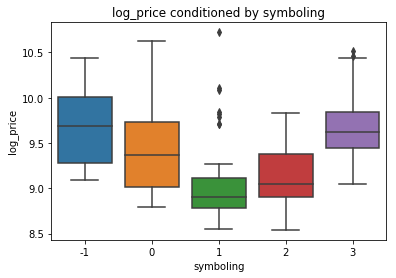

F statistic = 14.135592343141843
P-value = 4.381597214504394e-10


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  -1     0    -0.2275  -0.5373  0.0824 False 
  -1     1    -0.6248   -0.944 -0.3057  True 
  -1     2    -0.5173  -0.8661 -0.1686  True 
  -1     3     0.0366  -0.3365  0.4097 False 
  0      1    -0.3974   -0.633 -0.1617  True 
  0      2    -0.2899  -0.5644 -0.0154  True 
  0      3     0.2641  -0.0407  0.5689 False 
  1      2     0.1075  -0.1775  0.3924 False 
  1      3     0.6615   0.3472  0.9757  True 
  2      3     0.554    0.2097  0.8983  True 
---------------------------------------------


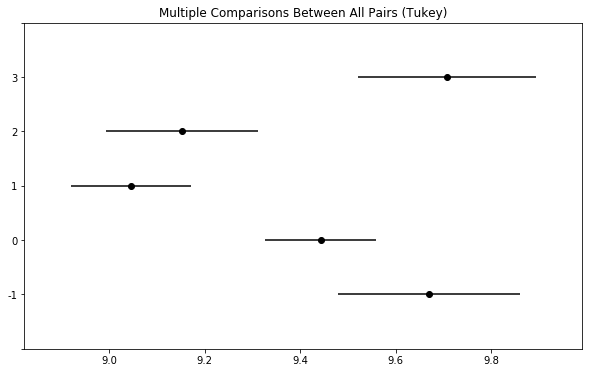

In [17]:
# symboling
make_boxplot('symboling')

sm1 = auto.groupby('symboling').get_group(-1)['log_price']
s0 = auto.groupby('symboling').get_group(0)['log_price']
s1 = auto.groupby('symboling').get_group(1)['log_price']
s2 = auto.groupby('symboling').get_group(2)['log_price']
s3 = auto.groupby('symboling').get_group(3)['log_price']

# ANOVA
f_statistic, p_value = ss.f_oneway(sm1, s0, s1, s2, s3)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((sm1, s0, s1, s2, s3)).flatten(),
                   'group_num': ['-1']*len(sm1)+['0']*len(s0)+['1']*len(s1)+
                   ['2']*len(s2)+['3']*len(s3)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>log_price by symboling summary:</b>
1. Graphical exploration: the boxplot shows variation between the distributions of the variables. (Also, in the multiple comparisons plot, the confidence intervals for some pairs do not overlap.)


2. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


3. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>-1 and 1</li>
        <li>-1 and 2</li>
    <li>0 and 1</li>
    <li>0 and 2</li>
    <li>1 and 3</li>
    <li>2 and 3</li>
</ul>

breakdown:
toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
mazda            12
subaru           12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64


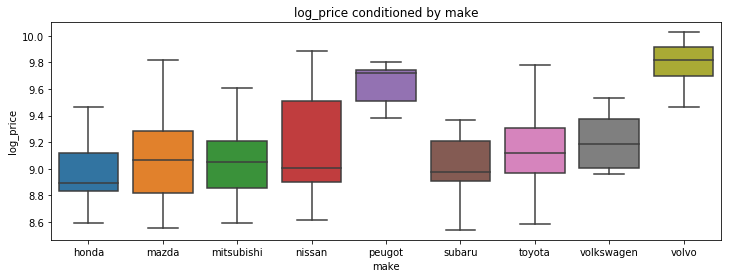

F statistic = 12.805768372281218
P-value = 4.701347507588505e-12


  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
  honda    mitsubishi  0.1013   -0.238  0.4406 False 
  honda      nissan    0.1905  -0.1244  0.5054 False 
  honda      peugot    0.6548   0.3004  1.0093  True 
  honda      subaru    0.0452  -0.3012  0.3915 False 
  honda      toyota    0.1707  -0.1138  0.4552 False 
  honda    volkswagen  0.2146  -0.1317  0.5609 False 
  honda      volvo     0.8028   0.4483  1.1572  True 
mitsubishi   nissan    0.0892  -0.2257  0.4041 False 
mitsubishi   peugot    0.5535   0.1991  0.908   True 
mitsubishi   subaru   -0.0561  -0.4025  0.2902 False 
mitsubishi   toyota    0.0694  -0.2151  0.354  False 
mitsubishi volkswagen  0.1133   -0.233  0.4596 False 
mitsubishi   volvo     0.7015   0.347   1.0559  True 
  nissan     peugot    0.4644   0.1333  0.7955  True 
  nissan     su

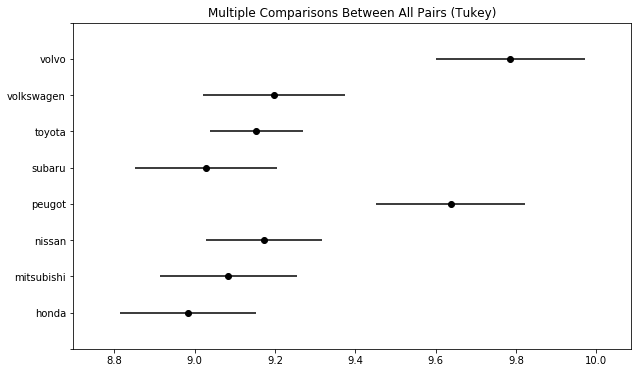

In [18]:
# make
make_boxplot('make', figsz=(12,4))

toyota = auto.groupby('make').get_group('toyota')['log_price']
nissan = auto.groupby('make').get_group('nissan')['log_price']
honda = auto.groupby('make').get_group('honda')['log_price']
mitsubishi = auto.groupby('make').get_group('mitsubishi')['log_price']
volkswagen = auto.groupby('make').get_group('volkswagen')['log_price']
subaru = auto.groupby('make').get_group('subaru')['log_price']
mazda = auto.groupby('make').get_group('mazda')['log_price']
peugot = auto.groupby('make').get_group('peugot')['log_price']
volvo = auto.groupby('make').get_group('volvo')['log_price']

# ANOVA
f_statistic, p_value = ss.f_oneway(toyota, nissan, honda, mitsubishi, volkswagen, subaru, peugot, volvo)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((toyota, nissan, honda, mitsubishi, volkswagen, subaru, peugot, volvo)).flatten(),
                   'group_num': ['toyota']*len(toyota)+['nissan']*len(nissan)+['honda']*len(honda)+
                   ['mitsubishi']*len(mitsubishi)+['volkswagen']*len(volkswagen)+
                   ['subaru']*len(subaru)+['peugot']*len(peugot)+['volvo']*len(volvo)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>log_price by make summary:</b>
1. Graphical exploration: the boxplot shows variation between the distributions of the variables. (Also, in the multiple comparisons plot, the confidence intervals for some pairs do not overlap.) In particular, the distributions of peugot and volvo look different from other groups.


2. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


3. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>honda and peugot</li>
        <li>honda and volvo</li>
    <li>mitsubishi and peugot</li>
    <li>mitsubishi and volvo</li>
    <li>nissan and peugot</li>
    <li>nissan and volvo</li>
        <li>peugot and subaru</li>
            <li>peugot and toyota</li>
                    <li>peugot and volkswagen</li>
                            <li>subaru and volvo</li>
                                    <li>toyota and volvo</li>
                                            <li>volkswagen and volvo</li>
    
</ul>

breakdown:
four    112
two      81
Name: num-of-doors, dtype: int64


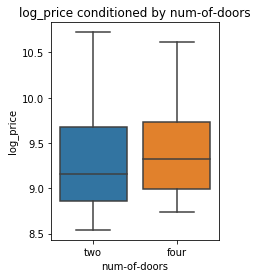

F statistic = 2.330602847650472
P-value = 0.12850698351860285


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower upper  reject
------------------------------------------
 four   two   -0.1134  -0.26 0.0331 False 
------------------------------------------


In [19]:
# num-of-doors
make_boxplot('num-of-doors', figsz=(3,4))

four = auto.groupby('num-of-doors').get_group('four')['log_price']
two = auto.groupby('num-of-doors').get_group('two')['log_price']

# ANOVA
f_statistic, p_value = ss.f_oneway(four, two)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((four, two)).flatten(),
                   'group_num': ['four']*len(four)+['two']*len(two)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

# Tukey_HSD.plot_simultaneous();

<b>log_price by num-of-doors summary:</b>
1. Graphical exploration: the boxplot shows small variation between the distributions of the variables. The distributions largely overlap.


2. From ANOVA: the F statistic is small and the p-value is large. We cannot reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is high.</li>


3. Consistent with ANOVA results, Tukey's HSD test shows that the pair are not statistically different at the 95% confidence level.

breakdown:
front    190
rear       3
Name: engine-location, dtype: int64


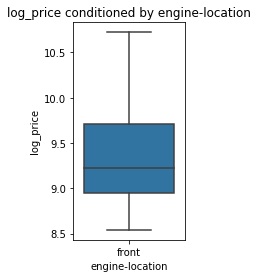

In [20]:
# engine-location
make_boxplot('engine-location', figsz=(2,4))
# only 1 category with >10 observations

<b>log_price by engine-location summary:</b>
Only 1 category with >10 observations

breakdown:
ohc     141
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine-type, dtype: int64


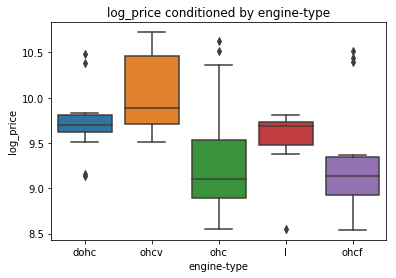

F statistic = 11.60384058605387
P-value = 1.9261012780440077e-08


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 dohc    l    -0.1815  -0.7017  0.3387 False 
 dohc   ohc   -0.4846  -0.8678 -0.1014  True 
 dohc   ohcf  -0.4163  -0.9098  0.0772 False 
 dohc   ohcv   0.3087  -0.2014  0.8188 False 
  l     ohc   -0.3031  -0.6863  0.0801 False 
  l     ohcf  -0.2348  -0.7283  0.2587 False 
  l     ohcv   0.4902  -0.0199  1.0003 False 
 ohc    ohcf   0.0684  -0.2777  0.4144 False 
 ohc    ohcv   0.7933   0.424   1.1627  True 
 ohcf   ohcv   0.725    0.2421  1.2078  True 
---------------------------------------------


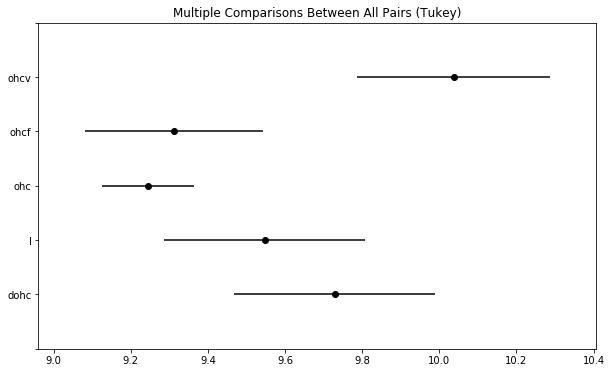

In [21]:
# engine-type
make_boxplot('engine-type')

ohc = auto.groupby('engine-type').get_group('ohc')['log_price']
ohcf = auto.groupby('engine-type').get_group('ohcf')['log_price']
ohcv = auto.groupby('engine-type').get_group('ohcv')['log_price']
l = auto.groupby('engine-type').get_group('l')['log_price']
dohc = auto.groupby('engine-type').get_group('dohc')['log_price']


# ANOVA
f_statistic, p_value = ss.f_oneway(ohc, ohcf, ohcv, l, dohc)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((ohc, ohcf, ohcv, l, dohc)).flatten(),
                   'group_num': ['ohc']*len(ohc)+['ohcf']*len(ohcf)+['ohcv']*len(ohcv)+
                   ['l']*len(l)+['dohc']*len(dohc)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>log_price by engine-type summary:</b>
1. Graphical exploration: the boxplot shows variation between the distributions of the variables. (Also, in the multiple comparisons plot, the confidence intervals for some pairs do not overlap.)


2. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


3. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>dohc and ohc</li>
        <li>ohc and ohcv</li>
    <li>ohcf and ohcv</li>
   
    
</ul>

breakdown:
four      153
six        24
five       10
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64


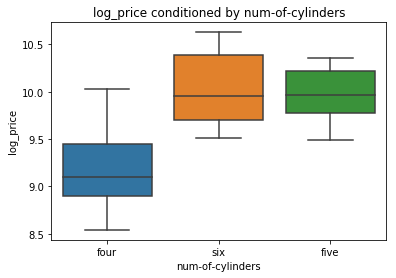

F statistic = 73.1580287123013
P-value = 4.185126417218107e-24


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 five   four  -0.7861  -1.0616 -0.5105  True 
 five   six    0.0467  -0.2711  0.3644 False 
 four   six    0.8327   0.6474  1.0181  True 
---------------------------------------------


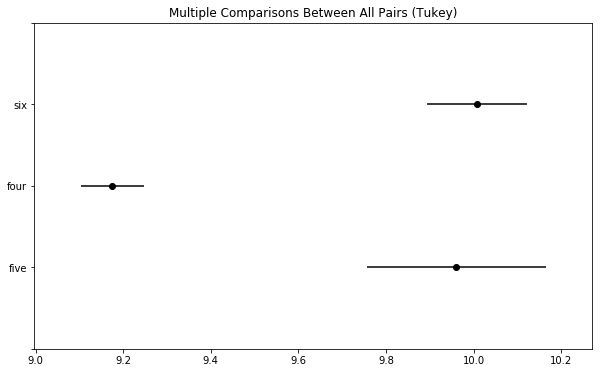

In [22]:
# num-of-cylinders
make_boxplot('num-of-cylinders')

four = auto.groupby('num-of-cylinders').get_group('four')['log_price']
six = auto.groupby('num-of-cylinders').get_group('six')['log_price']
five = auto.groupby('num-of-cylinders').get_group('five')['log_price']

# ANOVA
f_statistic, p_value = ss.f_oneway(four, six, five)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((four, six, five)).flatten(),
                   'group_num': ['four']*len(four)+['six']*len(six)+['five']*len(five)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>log_price by num-of-cylinders summary:</b>
1. Graphical exploration: the boxplot shows variation between the distributions of the variables. (Also, in the multiple comparisons plot, the confidence intervals for some pairs do not overlap.)


2. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


3. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>five and four</li>
        <li>four and six</li>
   
    
</ul>

breakdown:
mpfi    88
2bbl    64
idi     19
1bbl    11
spdi     9
mfi      1
spfi     1
Name: fuel-system, dtype: int64


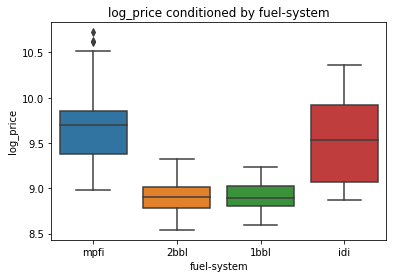

F statistic = 69.0005910804866
P-value = 1.1953255491936265e-29


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
_1bbl  _2bbl   -0.018  -0.3219 0.2858 False 
_1bbl   idi    0.6566   0.304  1.0093  True 
_1bbl   mpfi   0.7807   0.483  1.0784  True 
_2bbl   idi    0.6747   0.4315 0.9179  True 
_2bbl   mpfi   0.7988   0.6459 0.9517  True 
 idi    mpfi   0.1241  -0.1114 0.3596 False 
--------------------------------------------


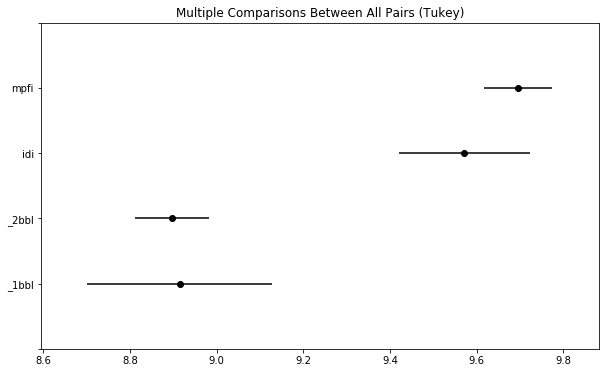

In [23]:
# fuel-system
make_boxplot('fuel-system')

mpfi = auto.groupby('fuel-system').get_group('mpfi')['log_price']
_2bbl = auto.groupby('fuel-system').get_group('2bbl')['log_price']
idi = auto.groupby('fuel-system').get_group('idi')['log_price']
_1bbl = auto.groupby('fuel-system').get_group('1bbl')['log_price']

# ANOVA
f_statistic, p_value = ss.f_oneway(mpfi, _2bbl, idi, _1bbl)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((mpfi, _2bbl, idi, _1bbl)).flatten(),
                   'group_num': ['mpfi']*len(mpfi)+['_2bbl']*len(_2bbl)+['idi']*len(idi)+['_1bbl']*len(_1bbl)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>log_price by fuel-system summary:</b>
1. Graphical exploration: the boxplot shows variation between the distributions of the variables. (Also, in the multiple comparisons plot, the confidence intervals for some pairs do not overlap.)


2. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


3. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>1bbl and idi</li>
        <li>1bbl and mpfi</li>
    <li>2bbl and idi</li>
    <li>2bbl and mpfi</li>
   
    
</ul>

breakdown:
4800.0    36
5500.0    35
5000.0    27
5200.0    23
5400.0    11
4500.0     7
5800.0     7
5250.0     7
6000.0     5
4200.0     5
4150.0     5
4750.0     4
4350.0     4
5900.0     3
4400.0     3
5100.0     3
4250.0     3
6600.0     2
4900.0     1
5600.0     1
5300.0     1
Name: peak-rpm, dtype: int64


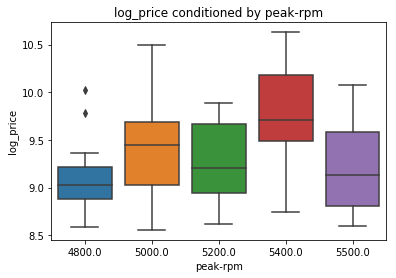

F statistic = 5.8958303943536094
P-value = 0.00021974446503854038


Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
rpm4800 rpm5000  0.2805  -0.0133  0.5744 False 
rpm4800 rpm5200  0.2023  -0.1059  0.5104 False 
rpm4800 rpm5400  0.6635   0.2658  1.0612  True 
rpm4800 rpm5500  0.1317  -0.1423  0.4057 False 
rpm5000 rpm5200 -0.0783  -0.4058  0.2493 False 
rpm5000 rpm5400  0.383   -0.0299  0.7958 False 
rpm5000 rpm5500 -0.1488  -0.4445  0.1469 False 
rpm5200 rpm5400  0.4612   0.0381  0.8844  True 
rpm5200 rpm5500 -0.0705  -0.3804  0.2393 False 
rpm5400 rpm5500 -0.5318  -0.9307 -0.1328  True 
-----------------------------------------------


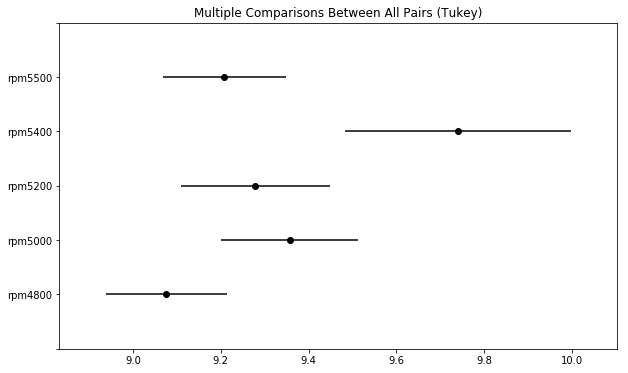

In [24]:
# peak-rpm
make_boxplot('peak-rpm')

rpm4800 = auto.groupby('peak-rpm').get_group(4800)['log_price']
rpm5500 = auto.groupby('peak-rpm').get_group(5500)['log_price']
rpm5000 = auto.groupby('peak-rpm').get_group(5000)['log_price']
rpm5200 = auto.groupby('peak-rpm').get_group(5200)['log_price']
rpm5400 = auto.groupby('peak-rpm').get_group(5400)['log_price']

# ANOVA
f_statistic, p_value = ss.f_oneway(rpm4800, rpm5500, rpm5000, rpm5200, rpm5400)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

print('\n')
# Tukey's HSD
df = pd.DataFrame({'vals': np.concatenate((rpm4800, rpm5500, rpm5000, rpm5200, rpm5400)).flatten(),
                   'group_num': ['rpm4800']*len(rpm4800)+['rpm5500']*len(rpm5500)+
                   ['rpm5000']*len(rpm5000)+['rpm5200']*len(rpm5200)+['rpm5400']*len(rpm5400)})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous();

<b>log_price by peak-rpm summary:</b>
1. Graphical exploration:  the boxplot shows variation between the distributions of the variables. (Also, in the multiple comparisons plot, the confidence intervals for some pairs do not overlap.)


2. From ANOVA: the F statistic is large and the p-value is small. We can reject the null hypothesis that the variables have the same mean, as the probability of the differences arising from random chance is low.</li>


3. From Tukey's HSD test, the following pairs are statistically different at the 95% confidence level:
<ul>
            <li>4800 and 5400</li>
        <li>5200 and 5400</li>
    <li>5400 and 5500</li>
   
    
</ul>